In [2]:
import pandas as pd

taula = pd.read_pickle('./data/processed/dataframe.pkl')


from auxiliary_functions import test_indepe_plot, test_indepe_bin_plot, 

In [3]:
AMB_PA = taula[taula["PA diagnosticada"] == 1.0]
AMB_PA_MECVV = taula[
    (taula["Dies entre primer ICD pneumònia i primer MECVV positiu"] < 30)]
SENSE_PA = taula[
           (taula["Dies entre primer ICD pneumònia i primer MECVV positiu"] > 30) &
           (taula['P diagnosticada'] == 1.0)]
TOTAL = taula

# Síndromes geriàtrics

## Index de Charlson

Comparació distributiva. Test d'independència. Test d'independència

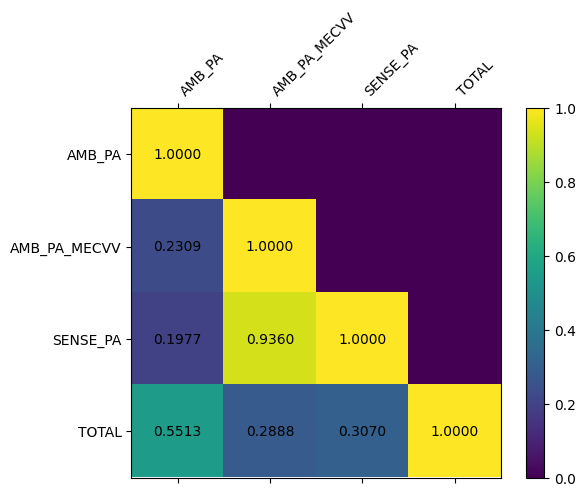

In [4]:
test_indepe_plot({'AMB_PA': AMB_PA['Charlson'], 'AMB_PA_MECVV': AMB_PA_MECVV['Charlson'], 'SENSE_PA': SENSE_PA['Charlson'], 'TOTAL': TOTAL['Charlson']})

## Caigudes prèvies

Comparació distributiva. Test d'independència. Test d'independència

In [ ]:
test_indepe_bin_plot('Caigudes previes')

## Deliris

#### Comparació distributiva. Test d'independència

In [ ]:
test_indepe_bin_plot('Deliris')

## Demència

#### Comparació distributiva. Test d'independència

In [5]:
test_indepe_bin_plot('Demència')

AttributeError: 'str' object has no attribute 'keys'

## Síndrome depressiu

#### Comparació distributiva. Test d'independència

In [ ]:
test_indepe_bin_plot()

## Incontinència urinària

#### Comparació distributiva. Test d'independència

In [ ]:
test_indepe_bin_plot()

## Incontinència fecal 

#### Comparació distributiva. Test d'independència

In [ ]:
test_indepe_bin_plot()

## Úlceres de pressió

#### Comparació distributiva. Test d'independència

In [ ]:
test_indepe_bin_plot()

## Immobilitat

#### Comparació distributiva. Test d'independència

In [ ]:
test_indepe_bin_plot()

## Confusió

#### Comparació distributiva. Test d'independència

In [6]:
test_indepe_bin_plot()

TypeError: test_indepe_bin_plot() missing 1 required positional argument: 'groups'

## Osteoporosi

#### Comparació distributiva. Test d'independència

In [ ]:
test_indepe_bin_plot()

## Sarcopènia

#### Comparació distributiva. Test d'independència

In [ ]:
test_indepe_bin_plot()

## Trastorns del son

#### Comparació distributiva. Test d'independència

In [ ]:
test_indepe_bin_plot()

## Dolor crònic

#### Comparació distributiva. Test d'independència

In [ ]:
test_indepe_bin_plot()

## Iatrogènic

#### Comparació distributiva. Test d'independència

In [ ]:
test_indepe_bin_plot()

## Restrenyiment

#### Comparació distributiva. Test d'independència

In [7]:
test_indepe_bin_plot()

TypeError: test_indepe_bin_plot() missing 1 required positional argument: 'groups'

# Historial mèdic/comorbiditats

## Malalties CV

#### Comparació distributiva. Test d'independència

In [ ]:
test_indepe_bin_plot()

## Malalties del cor

#### Comparació distributiva. Test d'independència

In [8]:
test_indepe_bin_plot()

TypeError: test_indepe_bin_plot() missing 1 required positional argument: 'groups'

## Malalties neurodegeneratives

#### Comparació distributiva. Test d'independència

In [ ]:
test_indepe_bin_plot()

## Diabetis mellitus

#### Comparació distributiva. Test d'independència

In [212]:
test_indepe_bin_plot()

Estadístic xi-quadrat entre SENSE_PA i TOTAL: 3.5555555555555554
P-valor entre SENSE_PA i TOTAL: 0.05934643879191998
No hi ha diferències significatives entre les distribucions de diabetis mellitus en SENSE_PA i TOTAL.


## Hepatopaties

#### Comparació distributiva. Test d'independència

In [222]:
test_indepe_bin_plot()

Estadístic xi-quadrat entre SENSE_PA i TOTAL: 0.0
P-valor entre SENSE_PA i TOTAL: 1.0
No hi ha diferències significatives entre les distribucions de hepatopaties en SENSE_PA i TOTAL.


## Neoplàsies

#### Comparació distributiva. Test d'independència

In [232]:
test_indepe_bin_plot()

Estadístic xi-quadrat entre SENSE_PA i TOTAL: 1.469387755102041
P-valor entre SENSE_PA i TOTAL: 0.22544231699450956
No hi ha diferències significatives entre les distribucions de neoplàsies en SENSE_PA i TOTAL.


## Malaltia crònica renal (creatinina > 1.5mg/dL)

#### Comparació distributiva. Test d'independència

In [ ]:
test_indepe_bin_plot()

## Fallida renal aguda (o insuficiència renal aguda)

#### Comparació distributiva. Test d'independència

In [ ]:
test_indepe_bin_plot()

## Marejos/síncope/lipotímia/reacció vasovagal

#### Comparació distributiva. Test d'independència

In [ ]:
test_indepe_bin_plot()

## VIH

#### Comparació distributiva. Test d'independència

In [9]:
test_indepe_bin_plot()

TypeError: test_indepe_bin_plot() missing 1 required positional argument: 'groups'

## Psicosi

#### Comparació distributiva. Test d'independència. Test d'independència

In [283]:
test_indepe_bin_plot()

Estadístic xi-quadrat entre SENSE_PA i TOTAL: 0.0
P-valor entre SENSE_PA i TOTAL: 1.0
No hi ha diferències significatives entre les distribucions de psicosi en SENSE_PA i TOTAL.


## Deficiències nutricionals

#### Comparació distributiva. Test d'independència

In [10]:
test_indepe_bin_plot()

TypeError: test_indepe_bin_plot() missing 1 required positional argument: 'groups'